In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("/Users/dhruvpai/Downloads/Datasets for practicals/car_evaluation.csv")

In [6]:
# Inspect column names to find the correct name for the target column
print("Column names:", data.columns)

Column names: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [7]:
# Assuming the target column might be 'class' or similar, adjust this based on actual column name
# Replace 'class' with the correct column name if different (e.g., 'safety')
target_column = 'class' if 'class' in data.columns else 'safety'

In [8]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoders in case of inverse transformation later


In [10]:
# Define features (X) and target (y)
X = data.drop(columns=["unacc"])  # Features
y = data["unacc"]  # Target variable


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [14]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519


Confusion Matrix:
 [[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]]


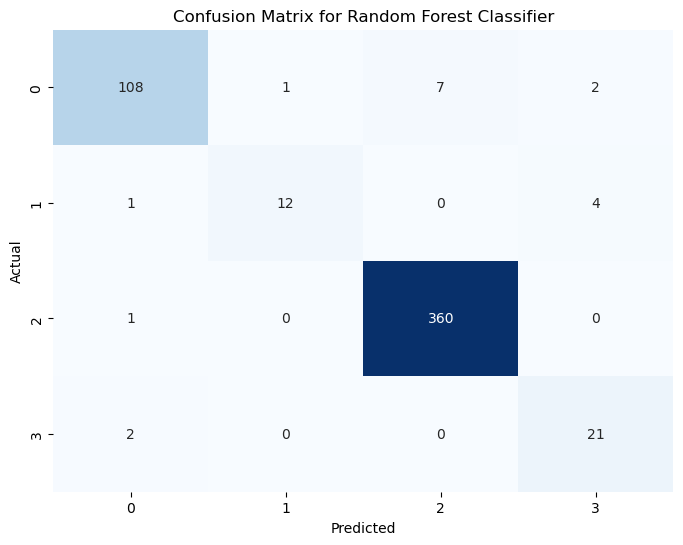

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

Explanation (Line by Line)

*Import Libraries:*
Imports pandas for data handling, LabelEncoder for encoding categorical variables, RandomForestClassifier for building the model, and train_test_split for splitting the data.
accuracy_score, classification_report, and confusion_matrix are used to evaluate model performance. seaborn and matplotlib.pyplot are for visualizing the confusion matrix.

*Load Dataset:*
data = pd.read_csv("filepath"): Loads the dataset from the specified path.

*Display Basic Dataset Information:*
print(data.head()) provides a quick look at the dataset structure and values.

*Encode Categorical Variables:*
Since this dataset is likely to contain categorical variables, the code iterates over all columns, encoding each one using LabelEncoder.
label_encoders[column] = le stores each encoder in case you need to inverse transform the labels later.
Each column is label-encoded since all features and target values are categorical. The LabelEncoder transforms each unique value into a numeric label, making the data suitable for the Random Forest model.

*Split Data into Features and Target:*
X = data.drop(columns=["class"]): Sets up the features (all columns except class).
y = data["class"]: Sets up the target variable (car safety class).
Defines X as all columns except 'unacc', which is the target column (y).

*Train-Test Split:*
Divides the dataset into training and testing sets, with 70% used for training and 30% for testing.

*Initialize and Train the Random Forest Classifier:*
RandomForestClassifier(random_state=42): Initializes the classifier. Setting random_state=42 ensures consistent results across runs.
rf_model.fit(X_train, y_train): Trains the model on the training data.

*Make Predictions:*
y_pred = rf_model.predict(X_test): Generates predictions for the test set.

*Evaluate Model Performance:*
accuracy_score(y_test, y_pred): Computes the accuracy of the model.
classification_report(y_test, y_pred): Provides precision, recall, and F1-score for each class.
confusion_matrix(y_test, y_pred): Generates a confusion matrix to assess the model’s performance visually.

*Plot Confusion Matrix:*
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ...): Plots a heatmap of the confusion matrix for a clearer view of classification performance.


*Explanation of Key Processes and Algorithms*
Random Forest Classifier: This ensemble learning method builds multiple decision trees on random subsets of data and features, then averages their predictions for more accurate and robust results.

Label Encoding: Converts categorical values into numeric labels, enabling the model to work with categorical data.

Confusion Matrix: Provides a matrix comparing actual and predicted values for each class, offering insight into model performance by class.
